In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [45]:
# Importing dataset
data = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

# Column rename.
data.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)
data

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [47]:
# missing values
null_count_col = data.isnull().sum().value_counts(ascending=False)

# null percentage for columns

null_percent_col = (data.isnull().sum() * 100 / len(data)).value_counts(ascending=False)

print("Null Count for Columns:\n\n", null_count_col, "\n")
print("Null Percentage for Columns:\n\n", null_percent_col)

Null Count for Columns:

 0    12
Name: count, dtype: int64 

Null Percentage for Columns:

 0.0    12
Name: count, dtype: int64


In [48]:
# null count for rows

null_count_row = data.isnull().sum(axis=1).value_counts(ascending=False)

# null percentage for rows

null_percent_row = (data.isnull().sum(axis=1) * 100 / len(data)).value_counts(ascending=False)

print("Null Count for Rows:\n\n", null_count_row, "\n")
print("Null Percentage for Rows:\n\n", null_percent_row)

Null Count for Rows:

 0    3999
Name: count, dtype: int64 

Null Percentage for Rows:

 0.0    3999
Name: count, dtype: int64


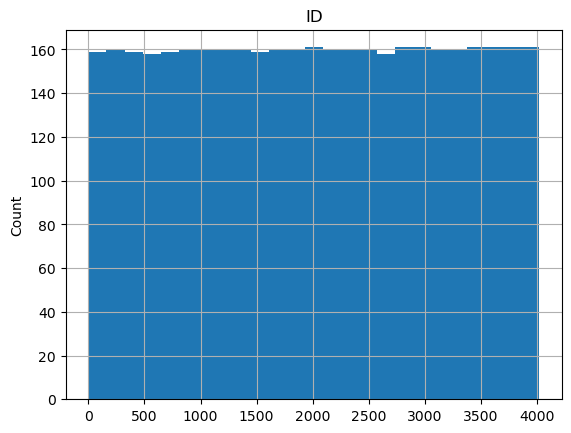

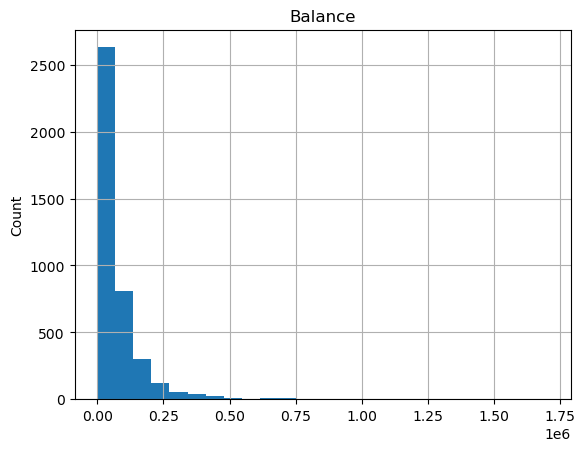

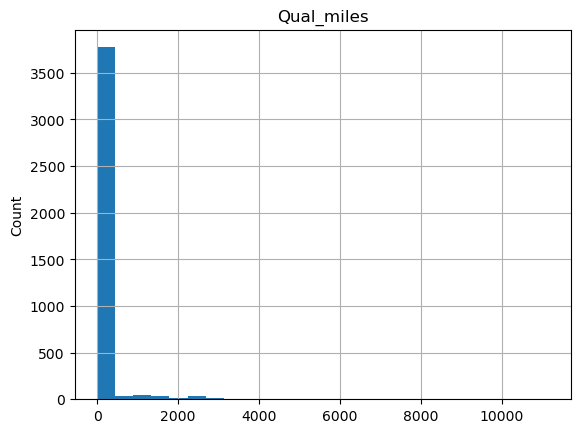

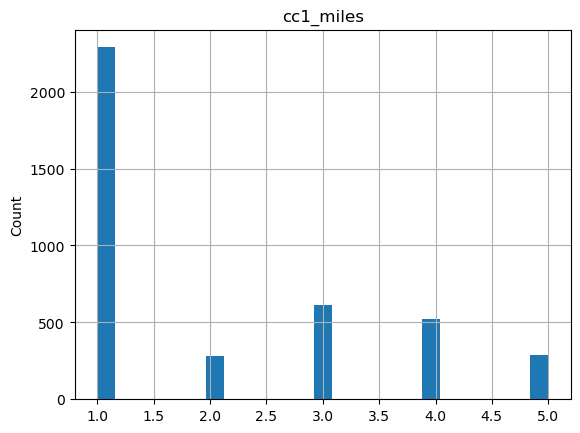

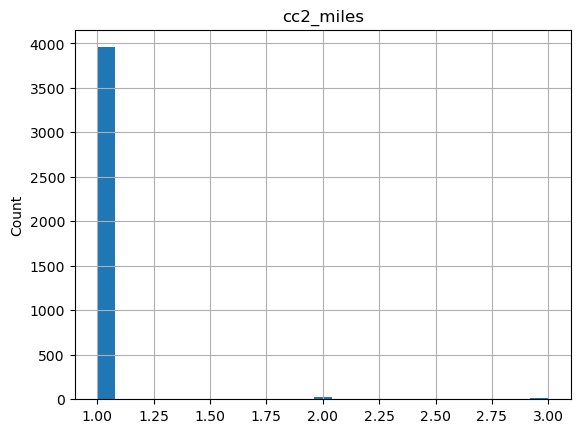

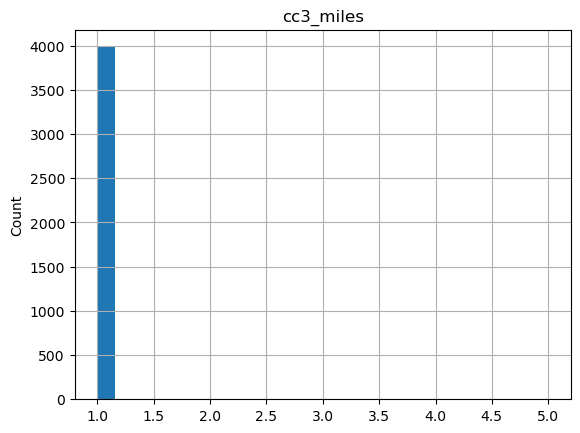

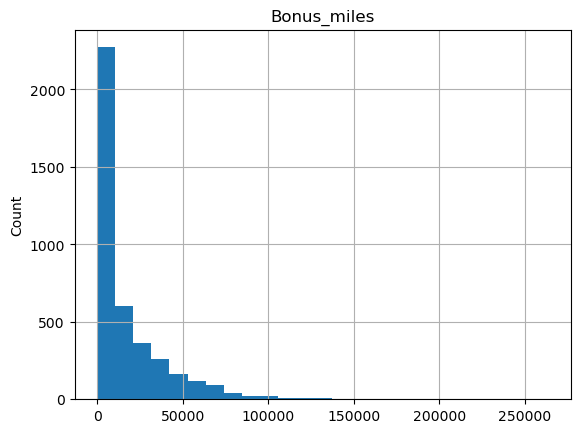

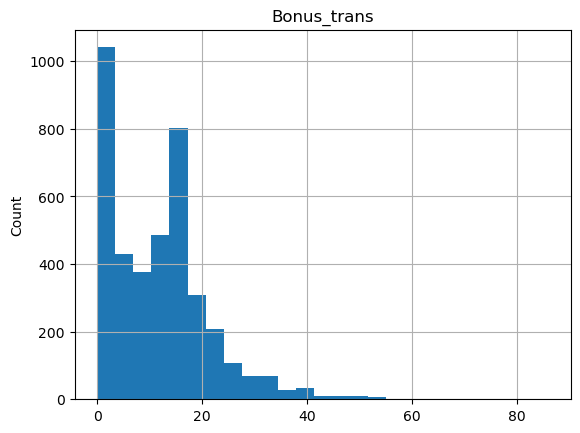

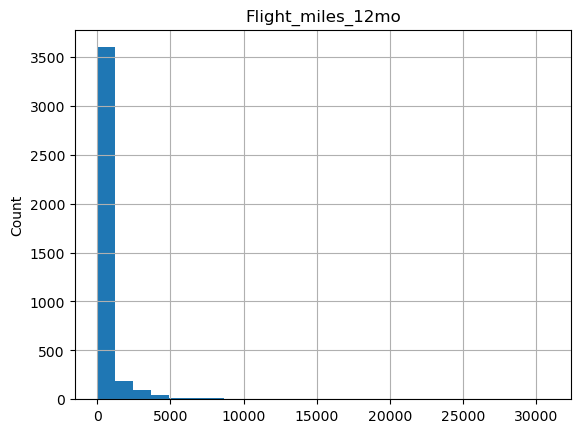

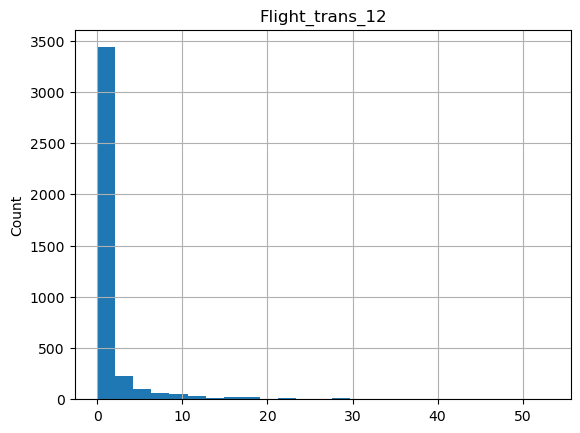

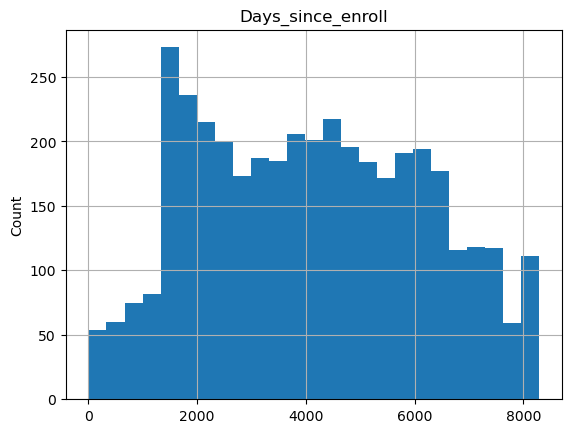

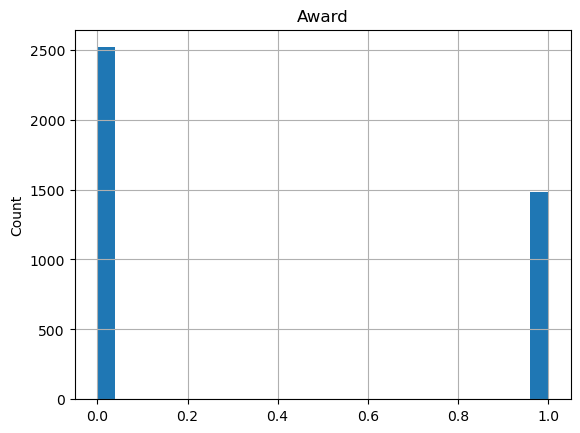

In [49]:
for feature in data.columns:
    data=data.copy()
    data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

ID


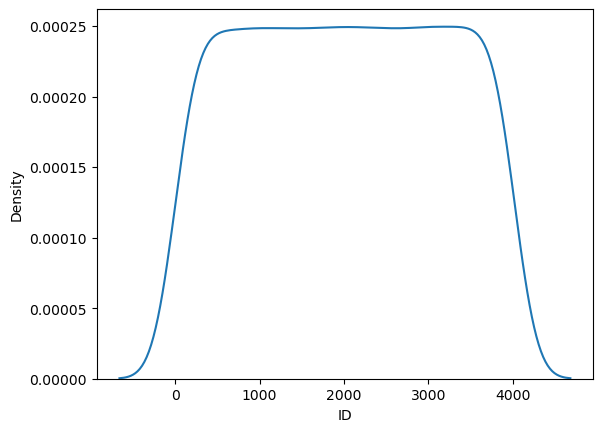

Balance


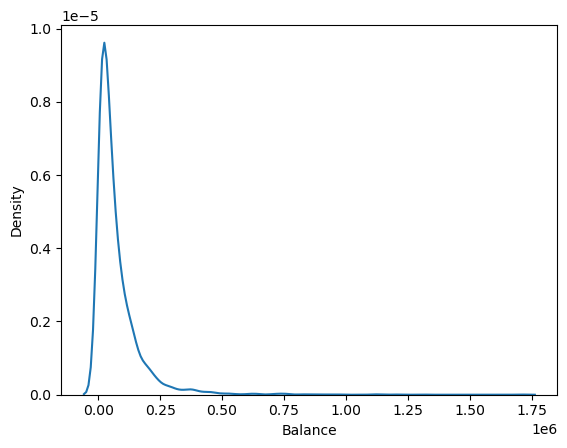

Qual_miles


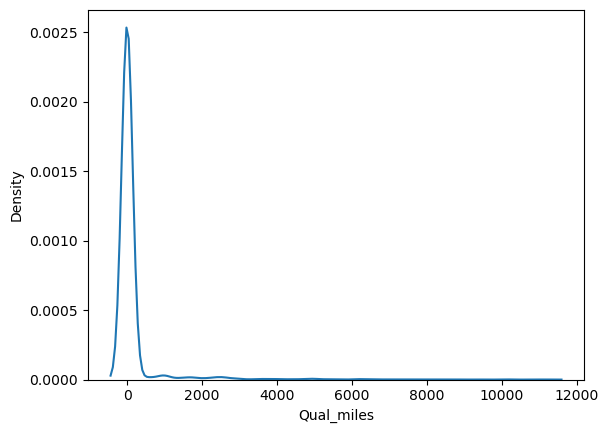

cc1_miles


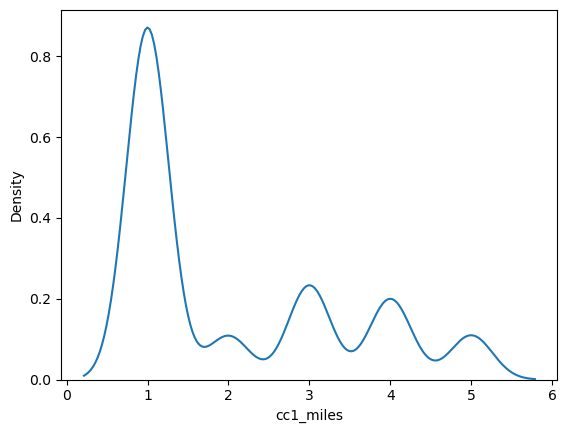

cc2_miles


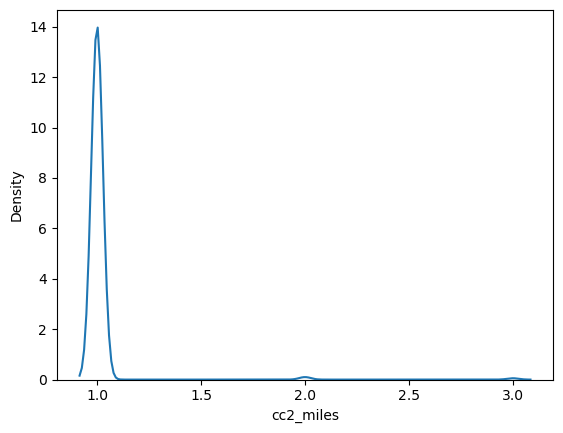

cc3_miles


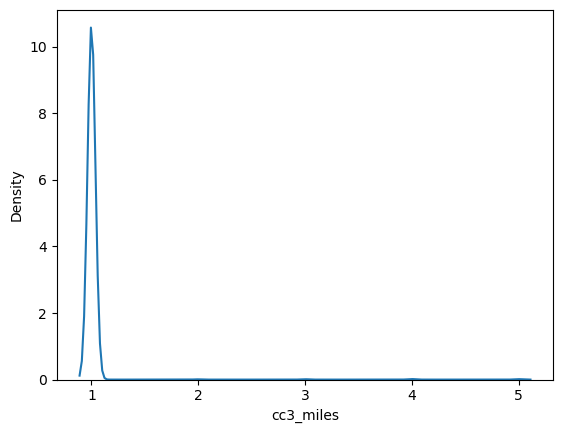

Bonus_miles


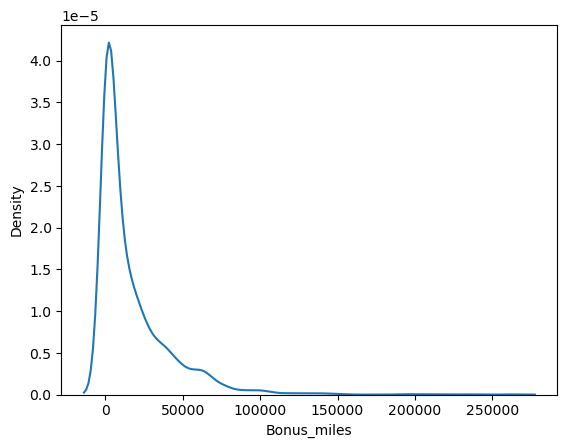

Bonus_trans


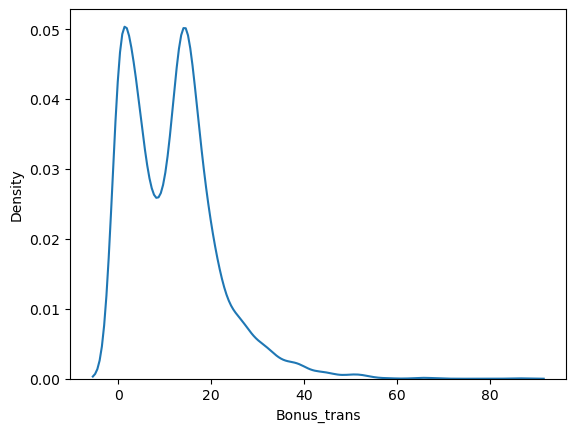

Flight_miles_12mo


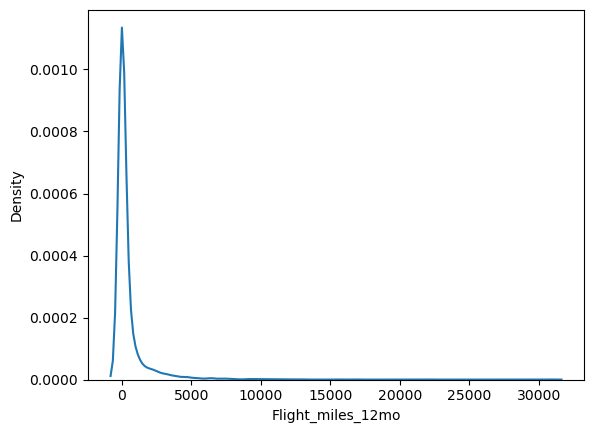

Flight_trans_12


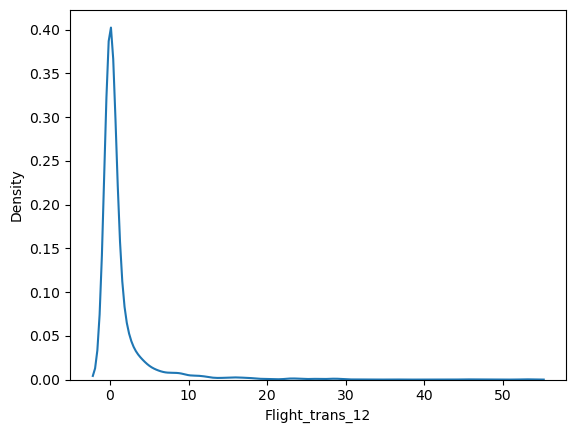

Days_since_enroll


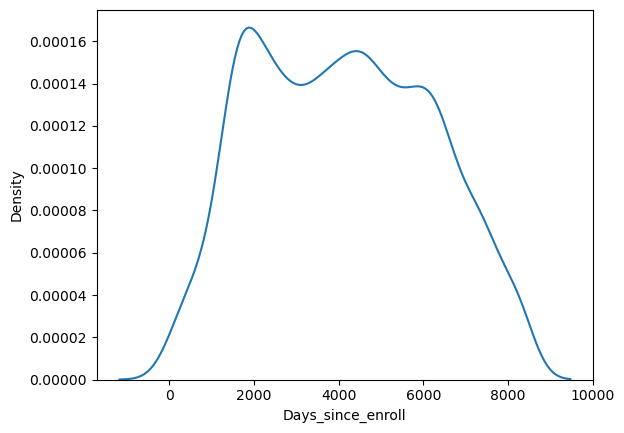

Award


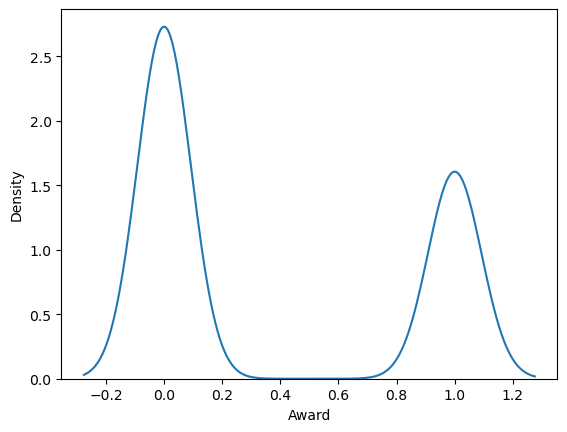

In [50]:
for n in data.columns:
    print(n)
    sns.kdeplot(data[n])
    plt.show()

In [51]:
#Outlier detection
data.columns

Index(['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

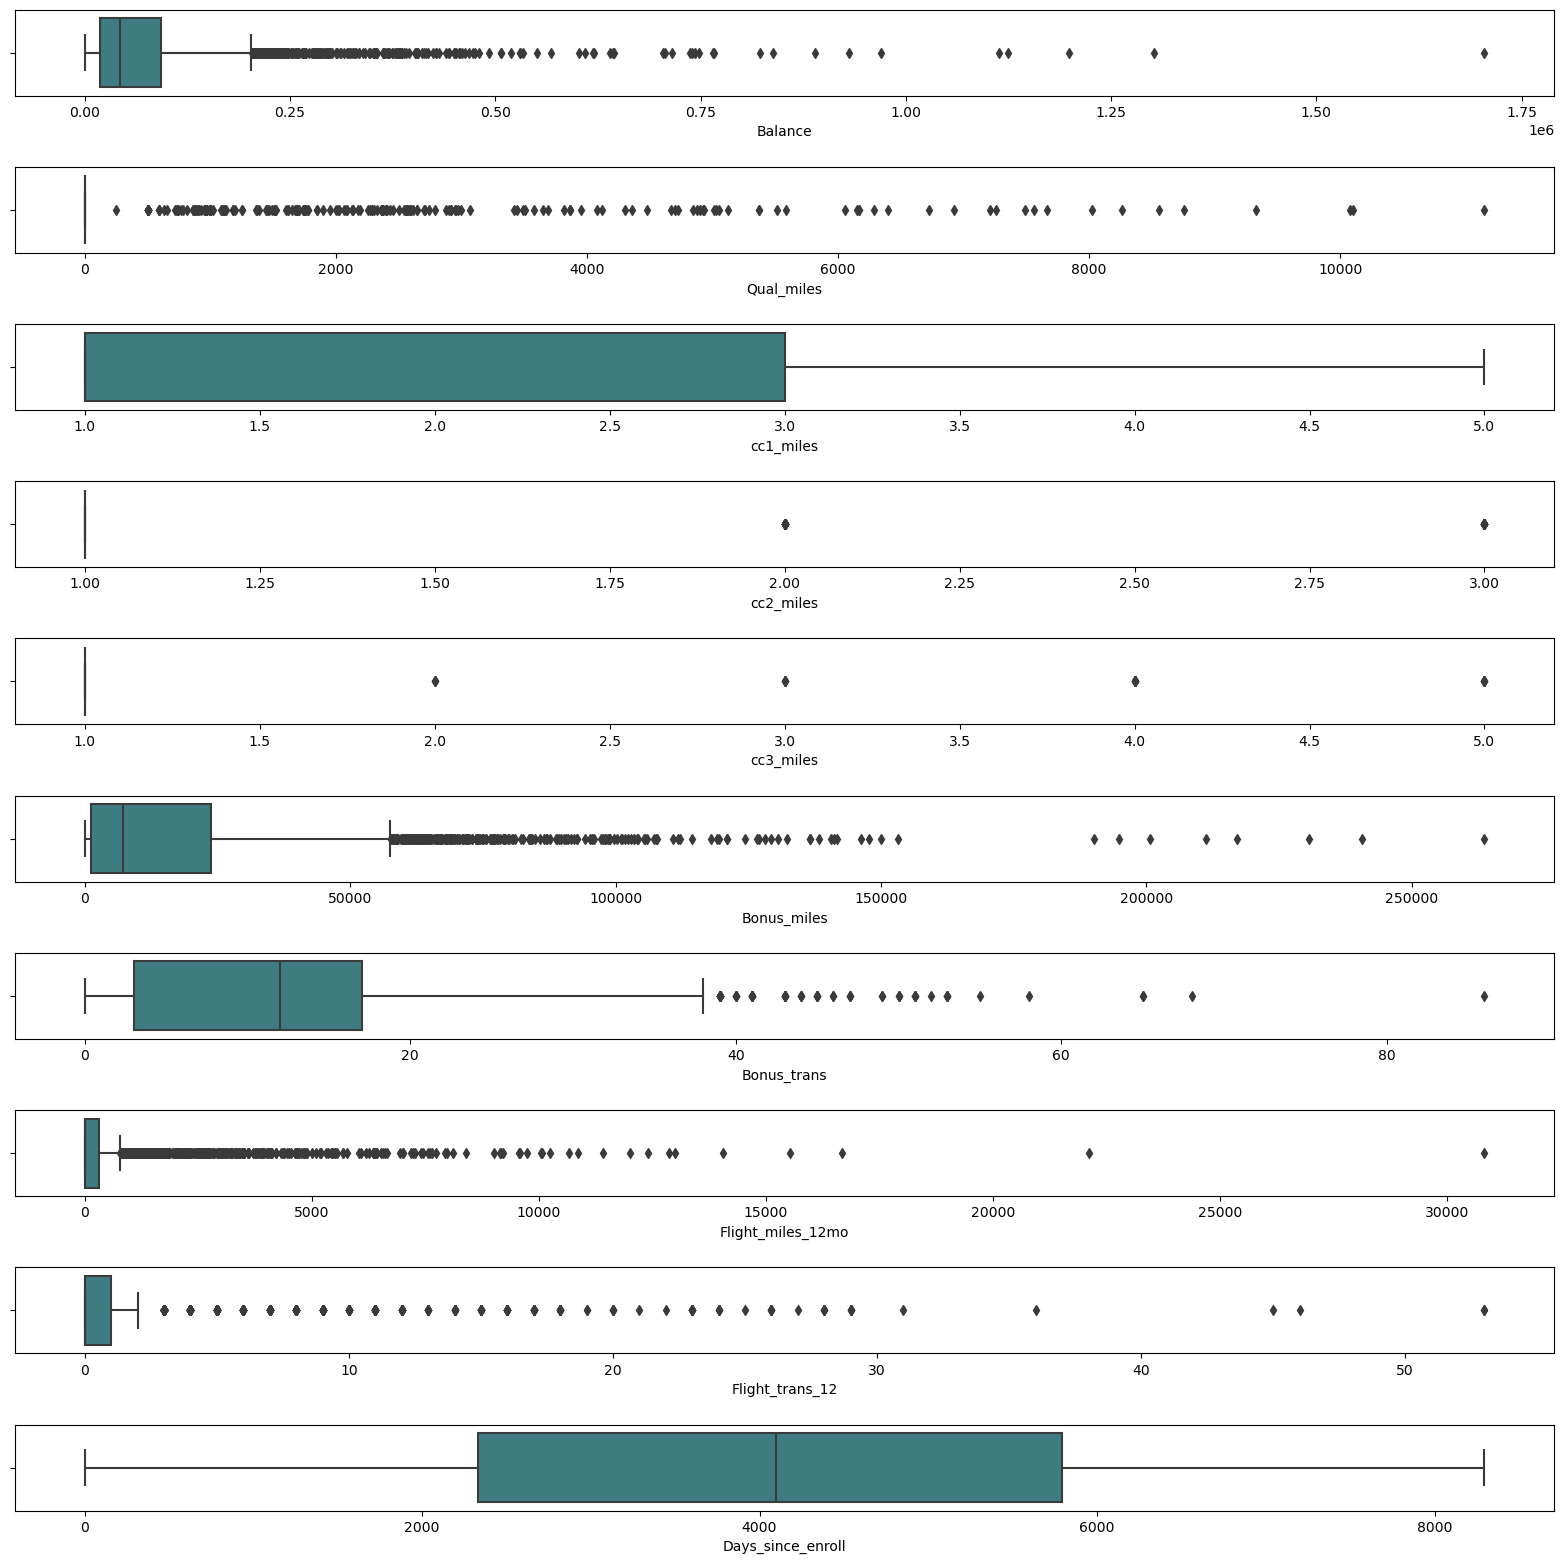

In [52]:
ot=data.copy() 
fig, axes=plt.subplots(10,1,figsize=(16,16),sharex=False,sharey=False)
sns.boxplot(x='Balance',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Qual_miles',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='cc1_miles',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='cc2_miles',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='cc3_miles',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Bonus_miles',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Bonus_trans',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Flight_miles_12mo',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='Flight_trans_12',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='Days_since_enroll',data=ot,palette='crest',ax=axes[9])
plt.tight_layout(pad=2.0)

<Axes: >

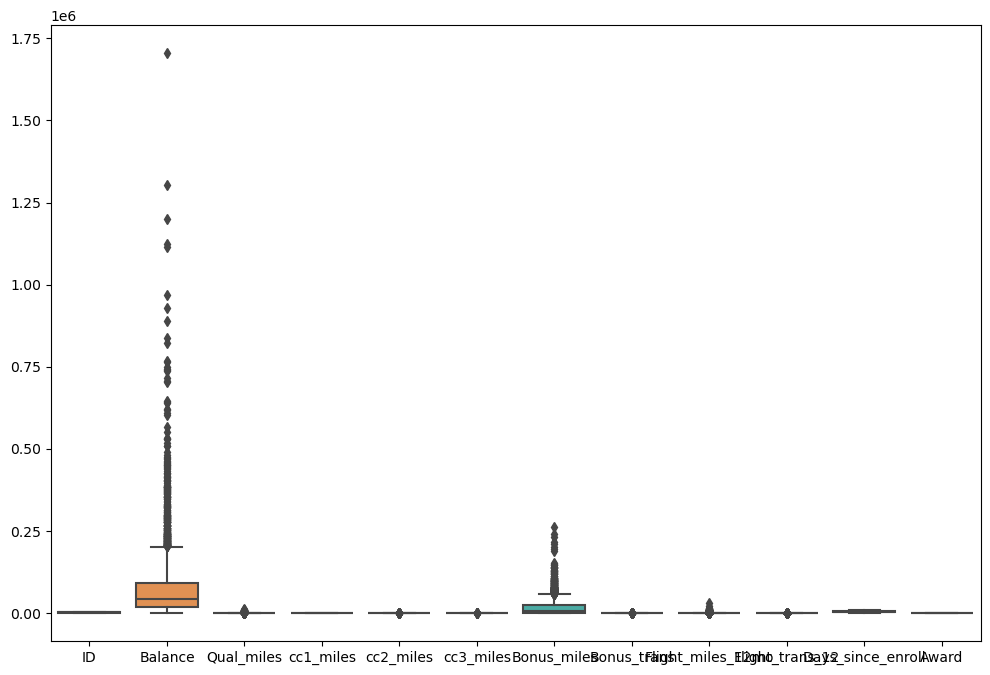

In [53]:
# Box plot for every feature in the same graph

plt.figure(figsize=(12,8))
sns.boxplot(data=data)

In [54]:
countNotermdeposit = len(data[data.Award == 0])
counthavetermdeposit = len(data[data.Award == 1])
print("Percentage of Customer doesn't have a Award: {:.2f}%".format((countNotermdeposit / (len(data.Award))*100)))
print("Percentage of Customer does have a Award: {:.2f}%".format((counthavetermdeposit / (len(data.Award))*100)))

Percentage of Customer doesn't have a Award: 62.97%
Percentage of Customer does have a Award: 37.03%


Text(0.5, 1.0, 'Whether the client has a Award or not ')

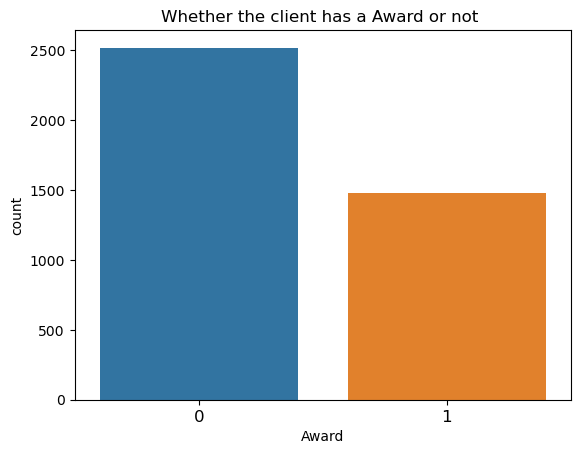

In [55]:
sns.countplot(x='Award', data=data, 
              order=data['Award'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Whether the client has a Award or not ')

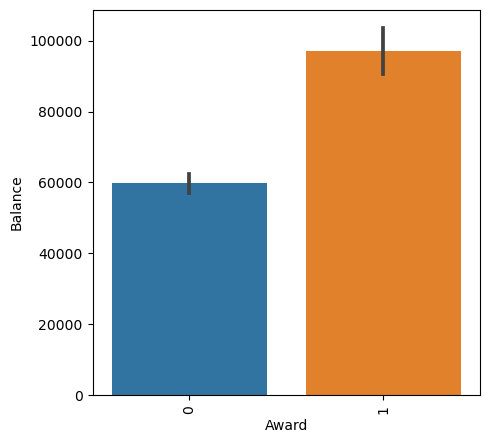

In [56]:
# Balance : Number of miles eligible for award travel

plt.figure(figsize = (5,5))
Balance = data[['Award','Balance']].sort_values('Balance', ascending = False)
ax = sns.barplot(x='Award', y='Balance', data= Balance)
ax.set(xlabel = 'Award', ylabel= 'Balance')
plt.xticks(rotation=90)
plt.show()

In [57]:
# what is correlated with Balance?

corr_matrix = data.corr()
corr_matrix["Balance"].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403487
cc1_miles            0.338344
Bonus_trans          0.324935
Days_since_enroll    0.263129
Flight_trans_12      0.255700
Flight_miles_12mo    0.217551
Award                0.178494
Qual_miles           0.108722
cc3_miles            0.035243
cc2_miles           -0.008804
ID                  -0.243737
Name: Balance, dtype: float64

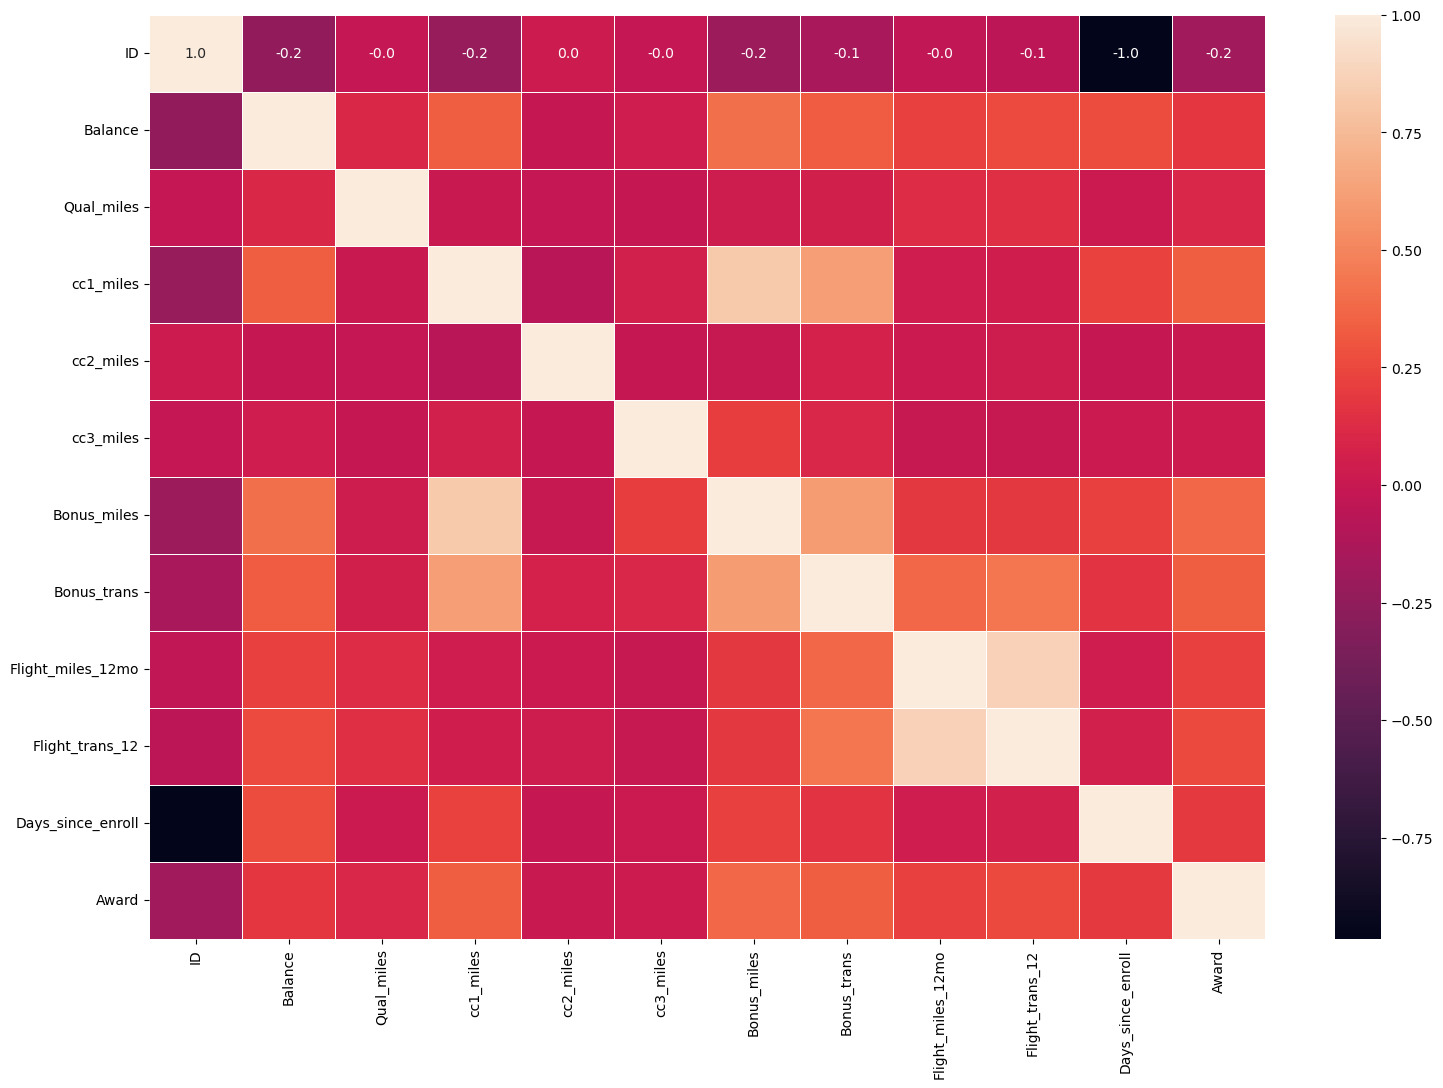

In [58]:
# correlation heatmap

f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

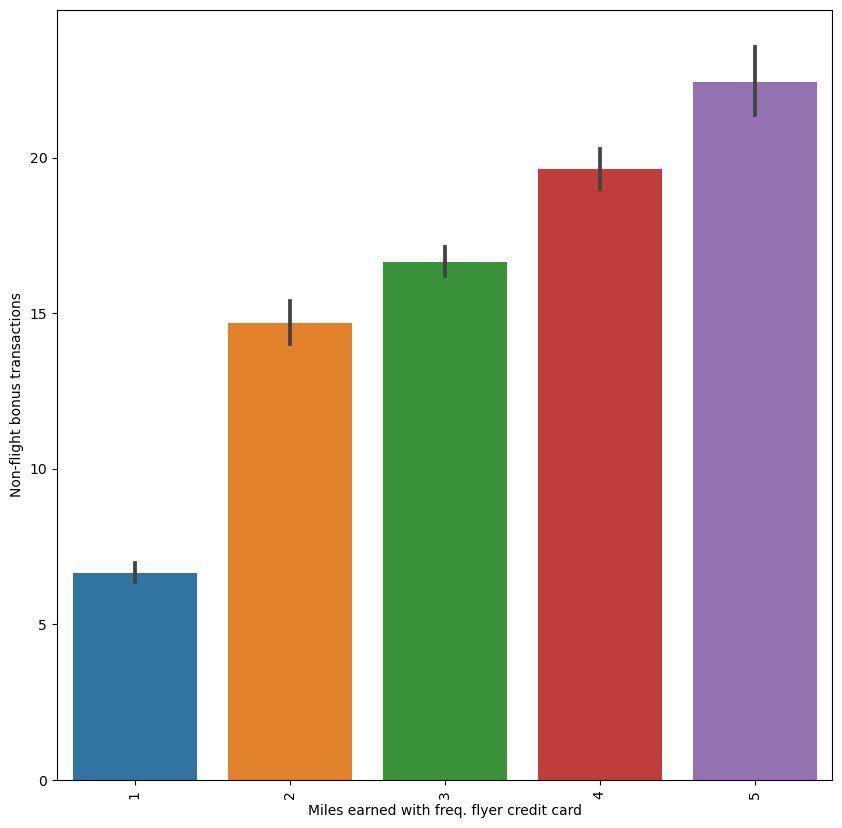

In [59]:
# Plotting frequent flying bonuses vs. non-flight bonus transactions 
plt.figure(figsize = (10,10))
sorted_data = data[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

In [60]:
#standardizing data
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(data)
std_df.shape

(3999, 12)

In [61]:
#normalizing data
# Using Minmaxscaler for accuracy result comparison

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(data)
minmax_df.shape

(3999, 12)

## Hierarchy Clustering

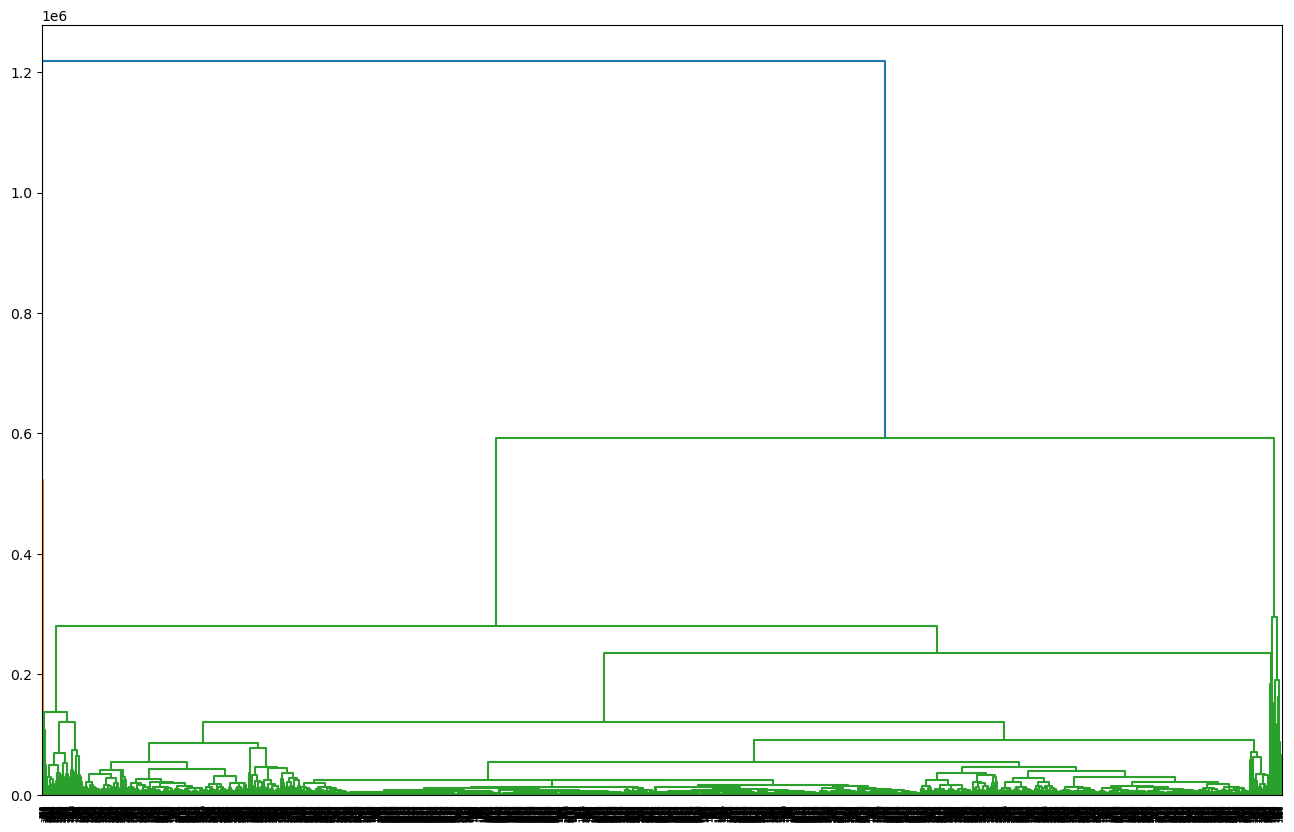

In [79]:
# create dendrogram
plt.figure(figsize = (16, 10));
dendrogram = sch.dendrogram(sch.linkage(data, method='average'))

In [80]:
# Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [81]:
# save clusters for chart
y_hc = hc.fit_predict(data)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [82]:
airlines = pd.concat([data,Clusters], axis=1)
airlines

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [83]:
airlines.sort_values("Clusters")

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
2658,2678,27438,0,1,1,1,2528,6,2528,6,2490,0,0
2659,2679,14748,0,1,1,1,2210,7,0,0,2497,1,0
2660,2680,49514,0,1,1,1,4500,22,0,0,2569,0,0
2661,2681,7457,0,1,1,1,17131,5,0,0,2496,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,516,889456,1024,5,1,1,98959,29,850,4,6652,1,4
117,120,969559,0,1,1,1,2500,3,1000,2,7718,1,4
1188,1200,837979,0,1,1,1,18372,15,1450,4,5373,1,4
3772,3795,822321,0,5,1,1,138334,26,600,2,3288,1,4


## K-Means

In [84]:
kmeans = KMeans(n_clusters=14,random_state=0)
kmeans.fit(data)

KMeans(n_clusters=14, random_state=0)

In [85]:
kmeans.inertia_

1834070337748.0334

In [86]:
import warnings
warnings.filterwarnings('ignore')

In [87]:
wcss = []
for i in range(1, 19):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

In [88]:
wcss

[42967206847420.69,
 20828852094270.242,
 11794254039243.766,
 7554668286111.572,
 5775051202470.376,
 4546507928780.688,
 3702589069199.208,
 3276988157640.795,
 2902566130528.815,
 2626868222415.188,
 2388857476451.363,
 2145927982985.307,
 1970924985403.443,
 1834070337748.0334,
 1704025192843.4019,
 1600642706952.2202,
 1471387695494.5977,
 1403671270869.3865]

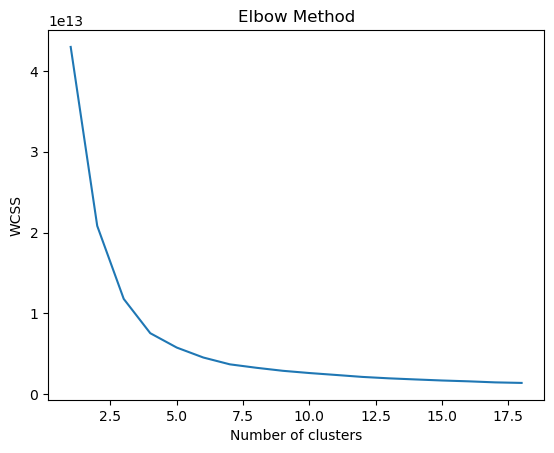

In [89]:
plt.plot(range(1, 19), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [90]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(7, random_state=0)
clusters_new.fit(data)

KMeans(n_clusters=7, random_state=0)

In [91]:
clusters_new.labels_

array([3, 3, 3, ..., 6, 6, 3])

In [92]:
# Converting array to dataframe
df = pd.DataFrame(clusters_new.labels_, columns =['Cluster ID'])

In [93]:
airlines1 = pd.concat([data,df], axis=1)
airlines1

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster ID
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,6
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,6
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,6


In [94]:
airlines2=airlines1.drop(['ID'], axis=1)

In [95]:
airlines2.groupby('Cluster ID').agg(['mean']).reset_index()

,Cluster ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1.275126e+05,230.817708,3.006944,1.013889,1.041667,32397.265625,16.447917,783.171875,2.295139,4746.440972,0.456597
1,1,7.283600e+05,258.636364,3.500000,1.000000,1.136364,62470.818182,22.000000,1600.909091,5.727273,6189.681818,0.863636
2,2,3.948273e+05,465.400000,3.188235,1.035294,1.000000,48679.482353,19.176471,1522.247059,4.682353,5859.458824,0.717647
3,3,1.980550e+04,96.539196,1.372362,1.017588,1.000000,6018.991960,7.609045,214.708040,0.673869,3609.872864,0.286432
4,4,2.210648e+05,303.074510,2.917647,1.000000,1.000000,34492.215686,18.105882,1094.184314,3.137255,5107.835294,0.505882
5,5,1.288916e+06,1528.000000,3.000000,1.000000,1.000000,39098.000000,24.600000,2754.600000,11.400000,7821.600000,0.800000
6,6,6.479469e+04,113.580675,2.500938,1.011257,1.020638,21970.452158,14.001876,472.782364,1.359287,4293.329268,0.408068


In [96]:
airlines2['Cluster ID'].value_counts()

Cluster ID
3    1990
6    1066
0     576
4     255
2      85
1      22
5       5
Name: count, dtype: int64

## DBSCAN

In [97]:
airlines.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [98]:
a=airlines.values
a

array([[    1, 28143,     0, ...,  7000,     0,     0],
       [    2, 19244,     0, ...,  6968,     0,     0],
       [    3, 41354,     0, ...,  7034,     0,     0],
       ...,
       [ 4019, 73597,     0, ...,  1402,     1,     0],
       [ 4020, 54899,     0, ...,  1401,     0,     0],
       [ 4021,  3016,     0, ...,  1398,     0,     0]], dtype=int64)

In [99]:
stscaler = StandardScaler().fit(a)
X1 = stscaler.transform(a)

In [100]:
dbscan = DBSCAN(eps=0.82, min_samples=6)
dbscan.fit(X1)


DBSCAN(eps=0.82, min_samples=6)

In [101]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [102]:
cl=pd.DataFrame(dbscan.labels_,columns=['Cluster'])

In [103]:
airlines3 = pd.concat([data,cl],axis=1)
airlines3

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [104]:
a = airlines3['Cluster'].value_counts()

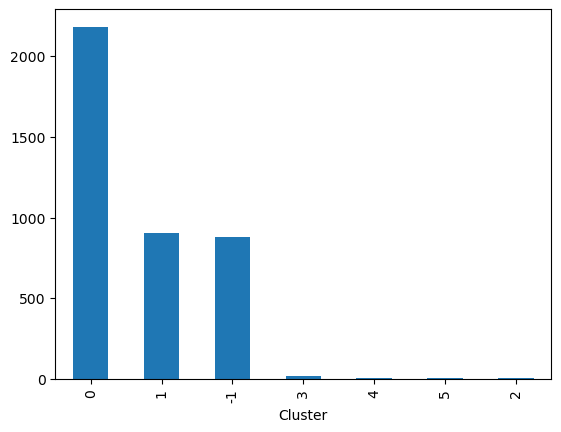

In [105]:
a.plot(kind = 'bar')
plt.show()